In [4]:
!ls                                

sample_data


In [2]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Jun 15 13:37 sample_data


In [3]:
!pwd

/content


In [7]:
!ls ./sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [9]:
!ls -l ./Wholesale_customers_data.csv

-rw-r--r-- 1 root root 15021 Jul  2 04:47 ./Wholesale_customers_data.csv


In [38]:
import pandas as pd
df = pd.read_csv('./Wholesale_customers_data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [41]:
X = df.iloc[:,:]
X.shape

(440, 8)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X) #fit을하게되면 데이터는 버리고 규칙만 갖고있는상태. 

In [46]:
X = scaler.transform(X)

In [48]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters = 5)

In [49]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
kmeans.labels_

array([3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1,
       1, 4, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 0, 3, 3, 1, 1, 3, 3, 1, 1, 0, 3, 1, 1, 3, 0, 3, 3, 1, 0,
       1, 3, 1, 1, 1, 4, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 0, 0, 4,
       1, 1, 1, 1, 0, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 0, 2, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 3, 2, 3,

In [51]:
df['label'] = kmeans.labels_

In [52]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,3


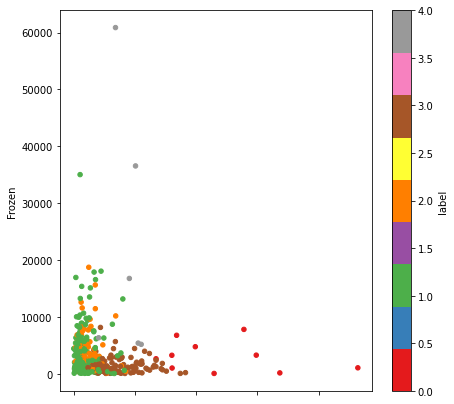

In [59]:
df.plot(kind='scatter',x = 'Grocery',y = 'Frozen', c='label', cmap='Set1',figsize = (7,7))

In [62]:
# for ~~~:
#     if ~(df['label'] == 0) | (df['label'] == 4):
dfx = df[~((df['label'] == 0) | (df['label'] == 4))] #?!!! error난거 같은데
df.shape, dfx.shape

((440, 9), (424, 9))

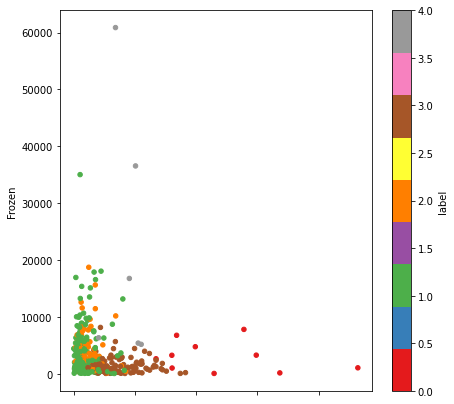

In [60]:
df.plot(kind='scatter',x = 'Grocery',y = 'Frozen', c='label', cmap='Set1',figsize = (7,7))

In [ ]:
df.to_excel('./wholesale.xls')